#  Stock Market Comparison Analysis

# Plan:
- Gathering historical stock price data for the companies or financial instruments you want to compare. 
- Ensuring that the data for different stocks is aligned in terms of time.
- Using data visualization techniques to present the comparison effectively.
- Applying statistical methods to identify patterns or relationships between the stocks being compared.
- Comparing the performance of the selected stocks or financial instruments against relevant benchmarks, such as market indices like the S&P 500.

In [29]:
pip  install yfinance 

In [30]:
import pandas as pd
import yfinance as yf
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

## Gathering historical stock price data

In [31]:
# Defining the tickers for Apple and Google
apple_ticker = 'AAPL'
google_ticker = 'GOOGL'

# Defining the date range for the last quarter
start_date = '2023-07-01'
end_date = '2023-09-30'

# Fetching historical stock price data using yfinance
apple_data = yf.download(apple_ticker, start=start_date, end=end_date)
google_data = yf.download(google_ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Comparing daily returns

In [32]:
# Calculating daily returns
apple_data['Daily_Return'] = apple_data['Adj Close'].pct_change()
google_data['Daily_Return'] = google_data['Adj Close'].pct_change()

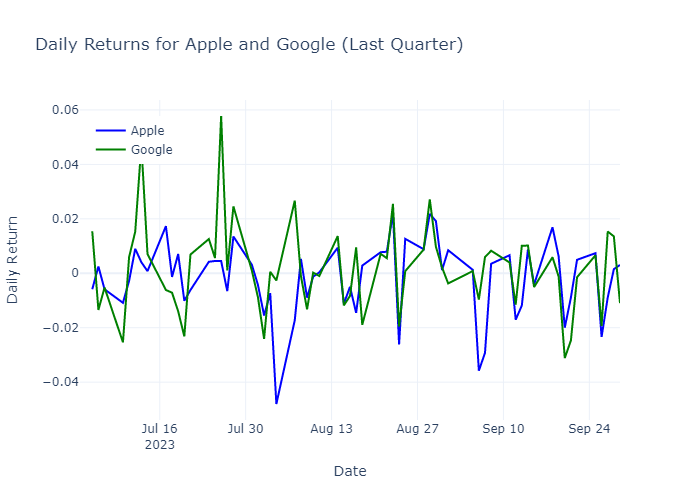

In [33]:
# Creating a figure to visualize the daily returns
fig = go.Figure()

fig.add_trace(go.Scatter(x=apple_data.index, y=apple_data['Daily_Return'],
                         mode='lines', name='Apple', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=google_data.index, y=google_data['Daily_Return'],
                         mode='lines', name='Google', line=dict(color='green')))

fig.update_layout(title='Daily Returns for Apple and Google (Last Quarter)',
                  xaxis_title='Date', yaxis_title='Daily Return',
                  legend=dict(x=0.02, y=0.95))

fig.show(renderer="png")

##  Comparing cumulative returns

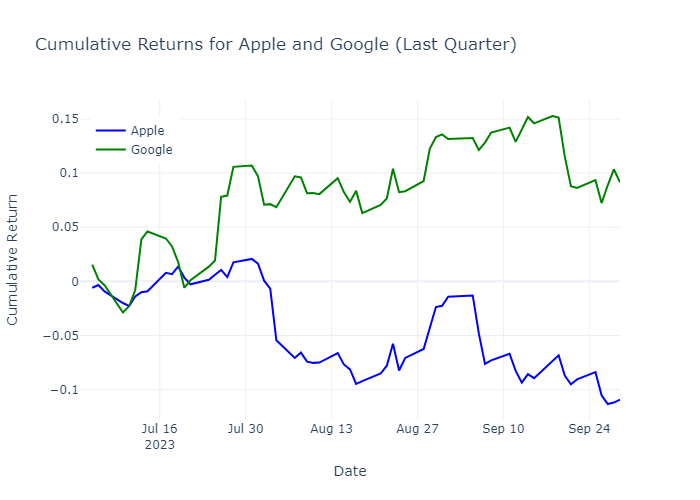

In [34]:
# Calculating cumulative returns for the last quarter
apple_cumulative_return = (1 + apple_data['Daily_Return']).cumprod() - 1
google_cumulative_return = (1 + google_data['Daily_Return']).cumprod() - 1

# Creating a figure to visualize the cumulative returns
fig = go.Figure()

fig.add_trace(go.Scatter(x=apple_cumulative_return.index, y=apple_cumulative_return,
                         mode='lines', name='Apple', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=google_cumulative_return.index, y=google_cumulative_return,
                         mode='lines', name='Google', line=dict(color='green')))

fig.update_layout(title='Cumulative Returns for Apple and Google (Last Quarter)',
                  xaxis_title='Date', yaxis_title='Cumulative Return',
                  legend=dict(x=0.02, y=0.95))

fig.show(renderer="png")

## Volatility Comparison

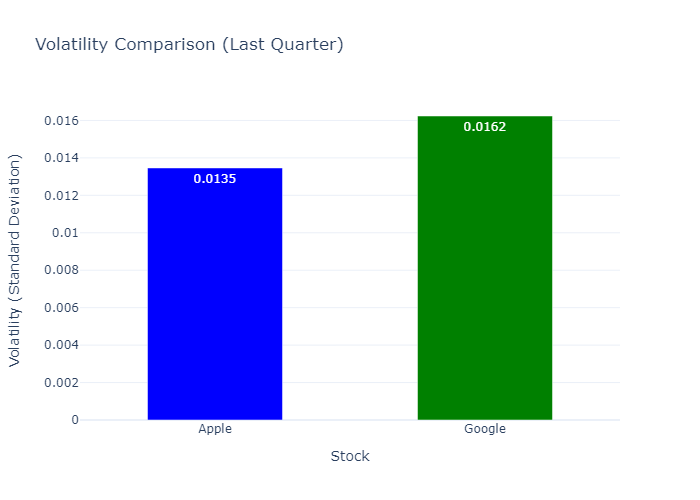

In [35]:
# Calculating historical volatility (standard deviation of daily returns)
apple_volatility = apple_data['Daily_Return'].std()
google_volatility = google_data['Daily_Return'].std()

# Creating a figure to compare volatility
fig1 = go.Figure()
fig1.add_bar(x=['Apple', 'Google'], y=[apple_volatility, google_volatility],
             text=[f'{apple_volatility:.4f}', f'{google_volatility:.4f}'],
             textposition='auto', marker=dict(color=['blue', 'green']))

fig1.update_layout(title='Volatility Comparison (Last Quarter)',
                   xaxis_title='Stock', yaxis_title='Volatility (Standard Deviation)',
                   bargap=0.5)
fig1.show(renderer="png")

We can see that Google’s volatility is higher than Apple’s.

It indicates that Google’s stock price experienced larger price fluctuations or greater price variability over the last quarter. Here’s what this difference in volatility may indicate:

- Google’s stock is considered riskier compared to Apple. Investors generally associate higher volatility with higher risk because it implies that the stock price can change significantly in a short period.
- Google’s stock may be more sensitive to market conditions, economic factors, or company-specific news and events. This heightened sensitivity can result in larger price swings.
- Traders and investors with a higher risk tolerance might find Google’s stock appealing if they are looking for opportunities to profit from short-term price movements.

## Comparing the stock market of Google and Apple according to the stock market benchmark (S&P 500)

In [36]:
market_data = yf.download('^GSPC', start=start_date, end=end_date)  # S&P 500 index as the market benchmark

# Calculating daily returns for both stocks and the market
apple_data['Daily_Return'] = apple_data['Adj Close'].pct_change()
google_data['Daily_Return'] = google_data['Adj Close'].pct_change()
market_data['Daily_Return'] = market_data['Adj Close'].pct_change()

# Calculating Beta for Apple and Google
cov_apple = apple_data['Daily_Return'].cov(market_data['Daily_Return'])
var_market = market_data['Daily_Return'].var()

beta_apple = cov_apple / var_market

cov_google = google_data['Daily_Return'].cov(market_data['Daily_Return'])
beta_google = cov_google / var_market

# Comparing Beta values
if beta_apple > beta_google:
    conclusion = "Apple is more volatile (higher Beta) compared to Google."
else:
    conclusion = "Google is more volatile (higher Beta) compared to Apple."

print("Beta for Apple:", beta_apple)
print("Beta for Google:", beta_google)
print(conclusion)

[*********************100%%**********************]  1 of 1 completed
Beta for Apple: 1.2257459204729635
Beta for Google: 1.5303069028356902
Google is more volatile (higher Beta) compared to Apple.


The beta value for Apple is approximately `1.2257`. This beta value suggests that Apple’s stock is estimated to be approximately `22.57%` more volatile or sensitive to market movements (as represented by the S&P 500 index) compared to the overall market. The beta value for Google is approximately `1.5303`. This beta value suggests that Google’s stock is estimated to be approximately `53.03%` more volatile or sensitive to market movements.

A beta greater than 1 suggests that a stock tends to be more volatile than the market. In this case, both Apple and Google have beta values greater than 1, indicating that they are expected to be more volatile and sensitive to market movements. Google’s higher beta value (`1.5303`) compared to Apple’s (`1.2257`) suggests that Google’s stock is estimated to have a higher degree of market sensitivity or risk compared to Apple. 

Investors should consider this information when making investment decisions, as higher-beta stocks can provide greater potential for returns but also carry a higher level of risk.